In [1]:
import networkx as nx
import warnings
import datetime
import seaborn as sn
sn.set()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
passengers = pd.read_csv("Results/passengers.csv")

In [3]:
passengers.head()

,Unnamed: 0,destination,lines,origin,route,transfers,transferstations
0,8f049322-7e25-11e9-b90a-7831c1d08f6a,Amstelstation,['metro54'],Nieuwmarkt,"['Nieuwmarkt', 'Waterlooplein', 'Weesperplein'...",0,[]
1,8f085778-7e25-11e9-9535-7831c1d08f6a,Station Holendrecht,['metro54'],Centraal Station,"['Centraal Station', 'Nieuwmarkt', 'Waterloopl...",0,[]
2,8f0b4082-7e25-11e9-997d-7831c1d08f6a,Station Duivendrecht,['metro54'],Amstelstation,"['Amstelstation', 'Spaklerweg', 'Van der Madew...",0,[]
3,8f0b6dbe-7e25-11e9-8459-7831c1d08f6a,Centraal Station,['metro52'],Noord,"['Noord', 'Noorderpark', 'Centraal Station']",0,[]
4,8f0fd246-7e25-11e9-90ca-7831c1d08f6a,Station Diemen-Zuid,"['metro54', 'metro53']",Waterlooplein,"['Waterlooplein', 'Weesperplein', 'Wibautstraa...",1,['Van der Madeweg']


In [4]:
dest = pd.DataFrame.from_dict(dict(Counter(passengers['destination'].tolist())), orient='index')
orig = pd.DataFrame.from_dict(dict(Counter(passengers['origin'].tolist())), orient='index')

In [5]:
dest = dest.reset_index()
dest.columns = ['stop','amount']
orig = orig.reset_index()
orig.columns = ['stop','amount']

In [6]:
dest.columns

Index(['stop', 'amount'], dtype='object')

In [7]:
orig['percentage'] = orig['amount'].apply(lambda x: (x/4510)* 100)
dest['percentage'] = dest['amount'].apply(lambda x: (x/4510)* 100)

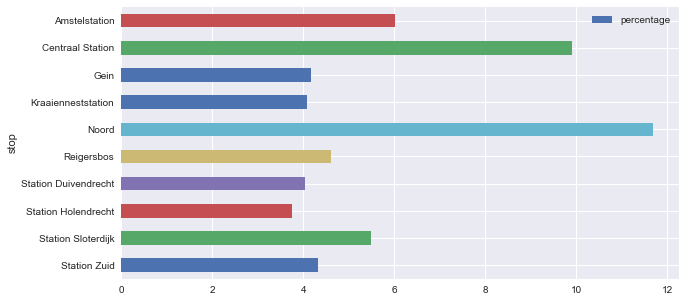

In [10]:
orig = (orig.sort_values(by = 'stop', ascending = False)).head(10)
orig.plot(kind = 'barh', x = 'stop', y = 'percentage', figsize = [10,5])

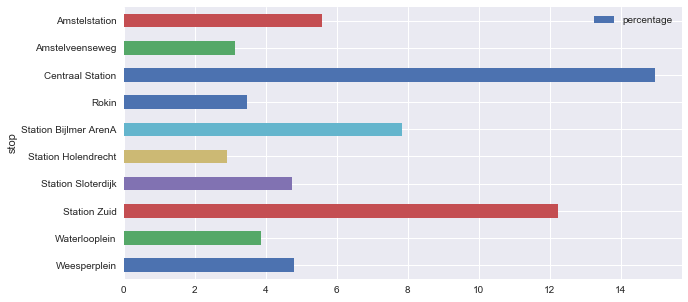

In [11]:
dest = (dest.sort_values(by = 'stop', ascending = False)).head(10)
dest.plot(kind = 'barh', x = 'stop', y = 'percentage', figsize = [10,5])